LAOISE LUCIANO - PHISHING MACHINE LEARNING

February 13, 2020

This was a project for my AI Cybersecurity class during the Spring 2020 Semester at the University of New Haven.

Our objective was to train a single-layer perceptron model to create a phish detector. We used the Phishing Website dataset ( https://archive.ics.uci.edu/ml/datasets/phishing+websites ) for training and evaluation of our model. The description of features can be found in the Data Folder at the following website.

To begin, the dataset available above was converted to a csv workbook and stripped of headers so that the top row would not skew results.  This was imported as a dataset named TrainingDataset-noheaders.csv which can be found in this corresponding GitHub.

As the first column in the dataset was the ID of the sample, the data was selected in a data frame using column 1 as the start and ending on column 30, ignoring the final results column.  The dataset was split into 4 datasets with a test size of 30% of the dataset.

Perceptron was utilized with 40 sample iterations to fit the data.  In this particular dataset, a comparison of the test and prediction data resulted in a 91% accuracy with only 282 misclassified samples.  In the demonstrated ROC curve, my model has an AUC or Area under the Curve of .97.  The closer this number is to 1.0, the better the model is at separating distinctions between classes.  Since this model has a 0.97 number with only 0.03 difference, this model is a good model for determining whether an item is a phishing website.

In [0]:
# Execute plot() inline without calling show()
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# using pandas to be able to handle a raw dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#reads in the dataset into a new data frame using pandas
df = pd.read_csv('TrainingDataset-noheaders.csv')
X = df.iloc[:, 1:30].values
y = df.iloc[:, 31].values


In [0]:
#randomly splits the dataset into 4 datasets: train and test; test size is 30% of the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)


The corresponding weights for each feature in the dataset
[[ 4.00000000e-01  2.00000000e-01 -8.00000000e-01 -2.77555756e-17
   2.77555756e-17  2.60000000e+00  6.00000000e-01  1.10000000e+00
   2.77555756e-17  2.00000000e-01  6.00000000e-01 -2.00000000e-01
   4.00000000e-01  2.60000000e+00  1.00000000e-01  3.00000000e-01
  -4.00000000e-01 -2.77555756e-17 -6.00000000e-01  2.00000000e-01
   2.00000000e-01 -4.00000000e-01 -2.77555756e-17  4.00000000e-01
   4.00000000e-01  2.00000000e-01  2.00000000e-01  2.00000000e-01
   8.00000000e-01]]

 A plot of the true positive rate against the false positive rate for our perceptron model:


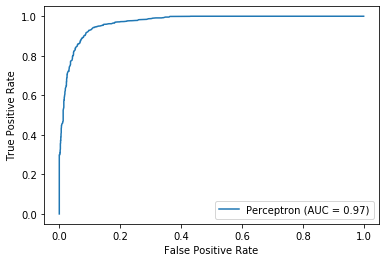

In [121]:
from sklearn.linear_model import Perceptron
#instantiate an object; when training go through a max of 40 random sample iterations; eta0 is a threshold
p = Perceptron(max_iter=40, eta0=0.1, random_state=0)
p.fit(X_train, y_train)
print("The corresponding weights for each feature in the dataset")
print(p.coef_)

#A plot of the true positive rate against the false positive rate for the set.
print("\n A plot of the true positive rate against the false positive rate for our perceptron model:")
p_disp = plot_roc_curve(p, X_test, y_test)



In [0]:
y_pred = p.predict(X_test)

In [113]:
from sklearn.metrics import accuracy_score
#if the accuracy score is 100% for a complicated model, take it with a grain of salt (overfitting or lying).  Most models are not perfect.
#first line is redundant based on second line but necessary; want to still be as concise as possible
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 282
Accuracy: 0.91


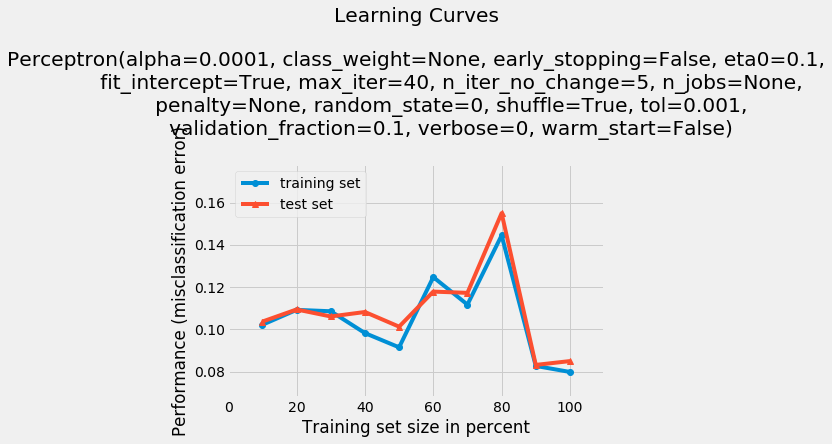

In [114]:
#Thanks to Sebastian Raschka for 'plot_learning_curves'
#http://rasbt.github.io/mlxtend/user_guide/plotting/plot_learning_curves/

from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test, clf=p)
plt.show()